In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
import time
import matplotlib.pyplot as plt 

In [21]:
#Function for plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors= ['b'] ):
    ax.plot(x, vy, 'b', label = "Validation Loss")
    ax.plot(x, ty, 'r', label = "Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw() 

In [22]:
(X_train, y_train),(X_test , y_test) = mnist.load_data()

In [23]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [24]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [25]:

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [26]:
print(X_train[3])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251
 253  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  68 236 251 211  31   8   

In [27]:
#As data is not normalized , let's normalize the data first
X_train = X_train/255
X_test = X_test/255

In [28]:
print(X_train[3])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [29]:
print(y_train[3])

1


In [30]:
#As the output is not categorical , let's make it categorical 
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [31]:
print(Y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
#Sequential : Linear stack of Layers
#Dense : it will do y = activation(WT. X + b)
#Activation : It is for activation function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
#Some model Parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [34]:
model = Sequential()
model.add(Dense(output_dim, input_dim= input_dim, activation='softmax'))

In [35]:
print(input_dim)

784


In [36]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2787 - accuracy: 0.6989 - val_loss: 0.8120 - val_accuracy: 0.8298
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7165 - accuracy: 0.8422 - val_loss: 0.6078 - val_accuracy: 0.8611
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.8603 - val_loss: 0.5256 - val_accuracy: 0.8752
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8695 - val_loss: 0.4800 - val_accuracy: 0.8826
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.8755 - val_loss: 0.4500 - val_accuracy: 0.8873
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4619 - accuracy: 0.8795 - val_loss: 0.4287 - val_accuracy: 0.8913
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.8832 - val_loss: 0.4126 - val_accuracy: 0.8951
Epoch 

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3354513943195343
Test accuracy: 0.909600019454956


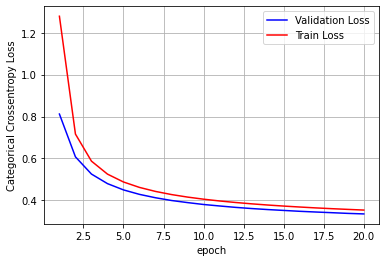

In [38]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# We will get val_loss , val_acc when validation_data is passed
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

MLP: Two Hidden layers with Sigmoid Activation


In [39]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape = (input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_sigmoid.compile(optimizer = 'sgd', loss= 'categorical_crossentropy', metrics =['accuracy'] )

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 2.2735 - accuracy: 0.2045 - val_loss: 2.2244 - val_accuracy: 0.3006
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1783 - accuracy: 0.4566 - val_loss: 2.1209 - val_accuracy: 0.5665
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 2.0565 - accuracy: 0.5745 - val_loss: 1.9727 - val_accuracy: 0.6472
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8811 - accuracy: 0.6334 - val_loss: 1.7638 - val_accuracy: 0.6461
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.6517 - accuracy: 0.6684 - val_loss: 1.5167 - val_accuracy: 0.7134
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 1.4112 - accuracy: 0.7105 - val_loss: 1.2872 - val_accuracy: 0.7618
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2062 - accuracy: 0.7470 - val_loss: 1.1054 - val_accuracy: 0.7655
Epoch 

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3354513943195343
Test accuracy: 0.909600019454956


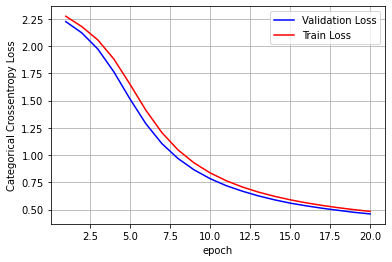

In [42]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# We will get val_loss , val_acc when validation_data is passed
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

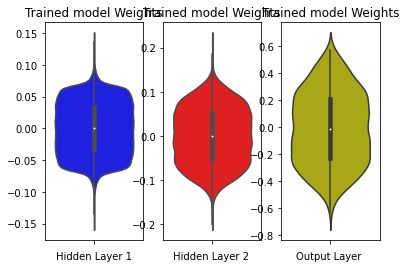

In [43]:
#Violin Plot of weights
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + ReLU + ADAM + Batch Normalization + DropOut with He Initialisation

In [48]:
from tensorflow.keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [50]:
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [51]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4823 - accuracy: 0.8529 - val_loss: 0.1553 - val_accuracy: 0.9526
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2269 - accuracy: 0.9318 - val_loss: 0.1176 - val_accuracy: 0.9646
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1757 - accuracy: 0.9460 - val_loss: 0.0964 - val_accuracy: 0.9706
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1479 - accuracy: 0.9558 - val_loss: 0.0838 - val_accuracy: 0.9743
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1308 - accuracy: 0.9599 - val_loss: 0.0772 - val_accuracy: 0.9758
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1151 - accuracy: 0.9642 - val_loss: 0.0725 - val_accuracy: 0.9764
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1083 - accuracy: 0.9666 - val_loss: 0.0703 - val_accuracy: 0.9798

In [52]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.05702924728393555
Test accuracy: 0.9836999773979187


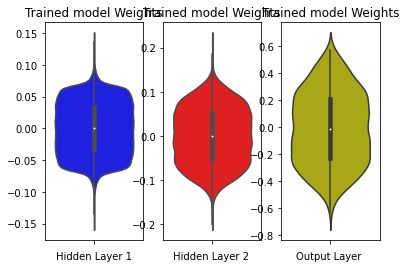

In [53]:
#Violin Plot of weights
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()